<a href="https://colab.research.google.com/github/AlejandroNunezArroyo/ComputerVision-Project/blob/main/VirtualWhiteboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary Imports



### Necessary Imports

In [2]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from PIL import Image
import random
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms

In [3]:
import os
from google.colab import drive

In [4]:
!git clone https://github.com/AlejandroNunezArroyo/ComputerVision-Project.git

Cloning into 'ComputerVision-Project'...
remote: Enumerating objects: 47586, done.
remote: Counting objects: 100% (47586/47586), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 47586 (delta 47484), reused 47467 (delta 47401), pack-reused 0
Receiving objects: 100% (47586/47586), 12.05 MiB | 26.78 MiB/s, done.
Resolving deltas: 100% (47484/47484), done.
Checking out files: 100% (196748/196748), done.


### Download The Dataset & Define The Transforms

In [47]:
class ChangeDataset(torch.utils.data.Dataset):
    def __init__(self, image_dirs, transform):
        def get_images(class_name):
            images = [x for x in os.listdir(image_dirs[class_name]) if x[-3:].lower().endswith('jpg')]
            print("Found", {len(images)}, " images in: ", {class_name}, "class")
            return images
        
        self.images = {}
        self.class_names =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '*', '/', '=', 'a', 'c']
        
        for class_name in self.class_names:
            self.images[class_name] = get_images(class_name)
            
        self.image_dirs = image_dirs
        self.transform = transform
        
    
    def __len__(self):
        return sum([len(self.images[class_name]) for class_name in self.class_names])
    
    
    def __getitem__(self, index):
        class_name = random.choice(self.class_names)
        index = index % len(self.images[class_name])
        image_name = self.images[class_name][index]
        image_path = os.path.join(self.image_dirs[class_name], image_name)
        image = Image.open(image_path)
        return self.transform(image), self.class_names.index(class_name)

In [48]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
train_dirs = {
    '0': 'ComputerVision-Project/dataset/train/0',
    '1': 'ComputerVision-Project/dataset/train/1',
    '2': 'ComputerVision-Project/dataset/train/2',
    '3': 'ComputerVision-Project/dataset/train/3',
    '4': 'ComputerVision-Project/dataset/train/4',
    '5': 'ComputerVision-Project/dataset/train/5',
    '6': 'ComputerVision-Project/dataset/train/6',
    '7': 'ComputerVision-Project/dataset/train/7',
    '8': 'ComputerVision-Project/dataset/train/8',
    '9': 'ComputerVision-Project/dataset/train/9',
    '+': 'ComputerVision-Project/dataset/train/symbol_+',
    '-': 'ComputerVision-Project/dataset/train/symbol_-',
    '*': 'ComputerVision-Project/dataset/train/symbol_*',
    '/': 'ComputerVision-Project/dataset/train/symbol_div',
    '=': 'ComputerVision-Project/dataset/train/symbol_=',
    'a': 'ComputerVision-Project/dataset/train/letter_a',
    'c': 'ComputerVision-Project/dataset/train/letter_c'
}
print('=====================================')
print('============= Train Data ============')
print('=====================================')
train_dataset = ChangeDataset(train_dirs, transform)
print('=====================================')
print('============= Test Data =============')
print('=====================================')
test_dirs = {
    '0': 'ComputerVision-Project/dataset/test/0',
    '1': 'ComputerVision-Project/dataset/test/1',
    '2': 'ComputerVision-Project/dataset/test/2',
    '3': 'ComputerVision-Project/dataset/test/3',
    '4': 'ComputerVision-Project/dataset/test/4',
    '5': 'ComputerVision-Project/dataset/test/5',
    '6': 'ComputerVision-Project/dataset/test/6',
    '7': 'ComputerVision-Project/dataset/test/7',
    '8': 'ComputerVision-Project/dataset/test/8',
    '9': 'ComputerVision-Project/dataset/test/9',
    '+': 'ComputerVision-Project/dataset/test/symbol_+',
    '-': 'ComputerVision-Project/dataset/test/symbol_-',
    '*': 'ComputerVision-Project/dataset/test/symbol_*',
    '/': 'ComputerVision-Project/dataset/test/symbol_div',
    '=': 'ComputerVision-Project/dataset/test/symbol_=',
    'a': 'ComputerVision-Project/dataset/test/letter_a',
    'c': 'ComputerVision-Project/dataset/test/letter_c'
}
test_dataset = ChangeDataset(test_dirs, transform)

batch_size = 32

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print('=====================================')
print('Number of training batches', len(trainloader))
print('Number of test batches', len(valloader))

============= Train Data ============
Found {5531}  images in:  {'0'} class
Found {21216}  images in:  {'1'} class
Found {20912}  images in:  {'2'} class
Found {8727}  images in:  {'3'} class
Found {5916}  images in:  {'4'} class
Found {2836}  images in:  {'5'} class
Found {2494}  images in:  {'6'} class
Found {2327}  images in:  {'7'} class
Found {2454}  images in:  {'8'} class
Found {2989}  images in:  {'9'} class
Found {20089}  images in:  {'+'} class
Found {27197}  images in:  {'-'} class
Found {2600}  images in:  {'*'} class
Found {159}  images in:  {'/'} class
Found {10483}  images in:  {'='} class
Found {9893}  images in:  {'a'} class
Found {4641}  images in:  {'c'} class
============= Test Data =============
Found {1383}  images in:  {'0'} class
Found {5304}  images in:  {'1'} class
Found {5229}  images in:  {'2'} class
Found {2182}  images in:  {'3'} class
Found {1480}  images in:  {'4'} class
Found {709}  images in:  {'5'} class
Found {624}  images in:  {'6'} class
Found {582

### Exploring The Data

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])


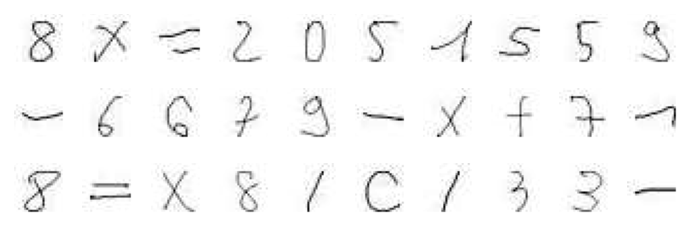

In [9]:
figure = plt.figure()
num_of_images = 30
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [10]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 17

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=17, bias=True)
  (5): LogSoftmax(dim=1)
)


In [11]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [12]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        ...,
        [ 0.0069,  0.0069,  0.0069,  ...,  0.0069,  0.0069,  0.0069],
        [-0.0057, -0.0057, -0.0057,  ..., -0.0058, -0.0058, -0.0058],
        [ 0.0025,  0.0024,  0.0025,  ...,  0.0025,  0.0025,  0.0025]])


In [13]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [14]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(32, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0082, -0.0319,  0.0330,  ...,  0.0340,  0.0038, -0.0226],
        [ 0.0002,  0.0207, -0.0099,  ..., -0.0266, -0.0160,  0.0306],
        [ 0.0036,  0.0072,  0.0046,  ...,  0.0224,  0.0242, -0.0303],
        ...,
        [ 0.0158,  0.0015,  0.0011,  ...,  0.0278,  0.0070,  0.0320],
        [-0.0011,  0.0310,  0.0026,  ...,  0.0225, -0.0325, -0.0042],
        [ 0.0303,  0.0028, -0.0295,  ...,  0.0157,  0.0250,  0.0214]],
       requires_grad=True)
Gradient - tensor([[-0.0023, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0046, -0.0046, -0.0046,  ..., -0.0046, -0.0046, -0.0046],
        ...,
        [-0.0008, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0026,  0.0026,  0.0025,  ...,  0.0026,  0.0026,  0.0026]])


In [15]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0082, -0.0319,  0.0331,  ...,  0.0341,  0.0038, -0.0226],
        [ 0.0002,  0.0207, -0.0099,  ..., -0.0266, -0.0160,  0.0306],
        [ 0.0036,  0.0073,  0.0046,  ...,  0.0225,  0.0242, -0.0302],
        ...,
        [ 0.0158,  0.0015,  0.0011,  ...,  0.0278,  0.0070,  0.0320],
        [-0.0011,  0.0310,  0.0026,  ...,  0.0225, -0.0325, -0.0042],
        [ 0.0302,  0.0028, -0.0295,  ...,  0.0157,  0.0249,  0.0214]],
       requires_grad=True)


### Core Training Of Neural Network

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 45
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 1.0945050265689142
Epoch 1 - Training loss: 0.38896181590709344
Epoch 2 - Training loss: 0.2649035261154035
Epoch 3 - Training loss: 0.21156559010546913
Epoch 4 - Training loss: 0.1769809653537458
Epoch 5 - Training loss: 0.1614331182494311
Epoch 6 - Training loss: 0.13770879804701808
Epoch 7 - Training loss: 0.12505103904530698
Epoch 8 - Training loss: 0.11366679537102505
Epoch 9 - Training loss: 0.10824068849696372
Epoch 10 - Training loss: 0.09438451323771127
Epoch 11 - Training loss: 0.09424102061215403
Epoch 12 - Training loss: 0.08506179757406641
Epoch 13 - Training loss: 0.08249360291422089
Epoch 14 - Training loss: 0.07627726540582766
Epoch 15 - Training loss: 0.06775821821570696
Epoch 16 - Training loss: 0.0665188722015173
Epoch 17 - Training loss: 0.06607418222087845
Epoch 18 - Training loss: 0.0625799896713433
Epoch 19 - Training loss: 0.05791643372192081
Epoch 20 - Training loss: 0.05580943065618911
Epoch 21 - Training loss: 0.0516752422167564
Epoch

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [16]:
from torch.autograd import Variable
error = nn.CrossEntropyLoss()
num_epochs = 4
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in trainloader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(images.shape[0], -1))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in valloader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(images.shape[0], -1))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 2.791804790496826, Accuracy: 24.114286422729492%
Iteration: 1000, Loss: 1.8493677377700806, Accuracy: 37.85514831542969%
Iteration: 1500, Loss: 1.2308017015457153, Accuracy: 50.91561508178711%
Iteration: 2000, Loss: 1.1879876852035522, Accuracy: 69.4245834350586%
Iteration: 2500, Loss: 1.8025774955749512, Accuracy: 66.48239135742188%
Iteration: 3000, Loss: 0.9116653203964233, Accuracy: 77.21195983886719%
Iteration: 3500, Loss: 0.5351191759109497, Accuracy: 76.58206176757812%
Iteration: 4000, Loss: 0.8815059661865234, Accuracy: 82.1634521484375%
Iteration: 4500, Loss: 0.598365068435669, Accuracy: 81.45381927490234%
Iteration: 5000, Loss: 0.41068848967552185, Accuracy: 84.45182800292969%
Iteration: 5500, Loss: 0.5793445706367493, Accuracy: 82.15547943115234%
Iteration: 6000, Loss: 0.8617478013038635, Accuracy: 82.5754165649414%
Iteration: 6500, Loss: 0.3796945810317993, Accuracy: 87.35149383544922%
Iteration: 7000, Loss: 0.20073485374450684, Accuracy: 88.75747680664

In [17]:
torch.save(model, './my_model_45.pt') 

Predictions using the already trained model

In [18]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(output_size), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(output_size))
    ax2.set_yticklabels(np.arange(output_size))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 8


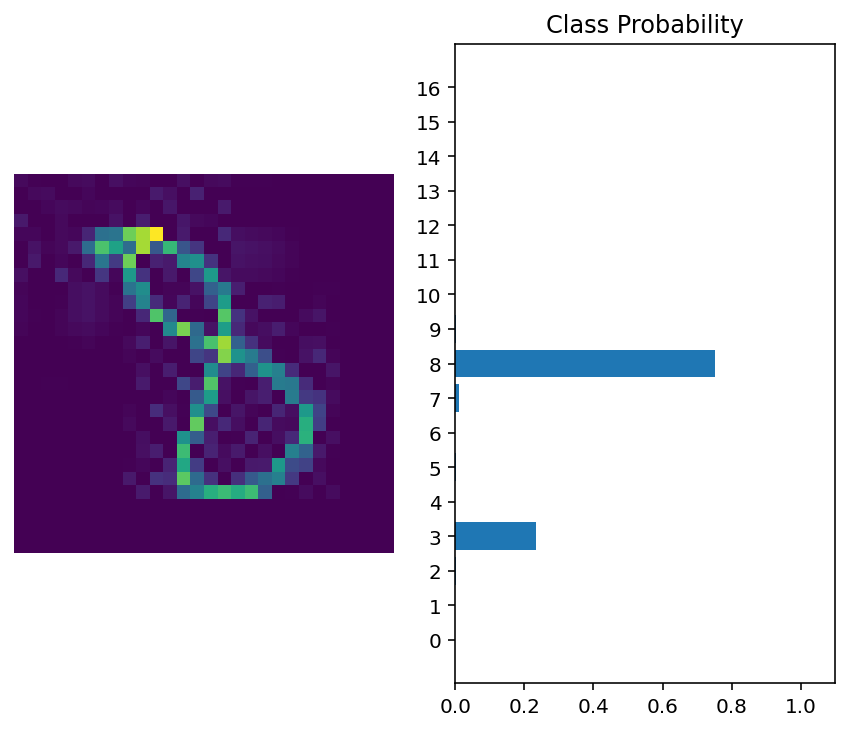

In [19]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [25]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))


Number Of Images Tested = 37625

Model Accuracy = 0.9323056478405316


## Evaluacion de modelo individual

In [26]:
model_nuevo = torch.load('./my_model_45.pt')
model_nuevo.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=17, bias=True)
  (5): LogSoftmax(dim=1)
)

Load an image 

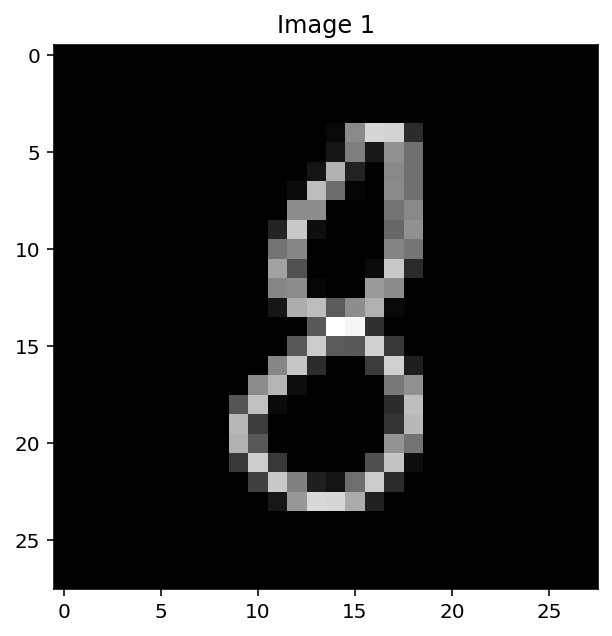

In [44]:
import matplotlib.pyplot as plt

import numpy as np
import cv2
import os

%matplotlib inline

img1 = cv2.imread('2_img.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
f, (ax1) = plt.subplots(1, 1, figsize=(5,5))
ax1.set_title('Image 1')
ax1.imshow(gray1, cmap='gray')

In [45]:
# Define a transform to normalize the data
elpepe = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(0.5, 0.5),
                             ])
elpepe_img = elpepe(gray1)
print(elpepe_img.shape)

torch.Size([1, 28, 28])


Test an image

Predicted Digit = 8


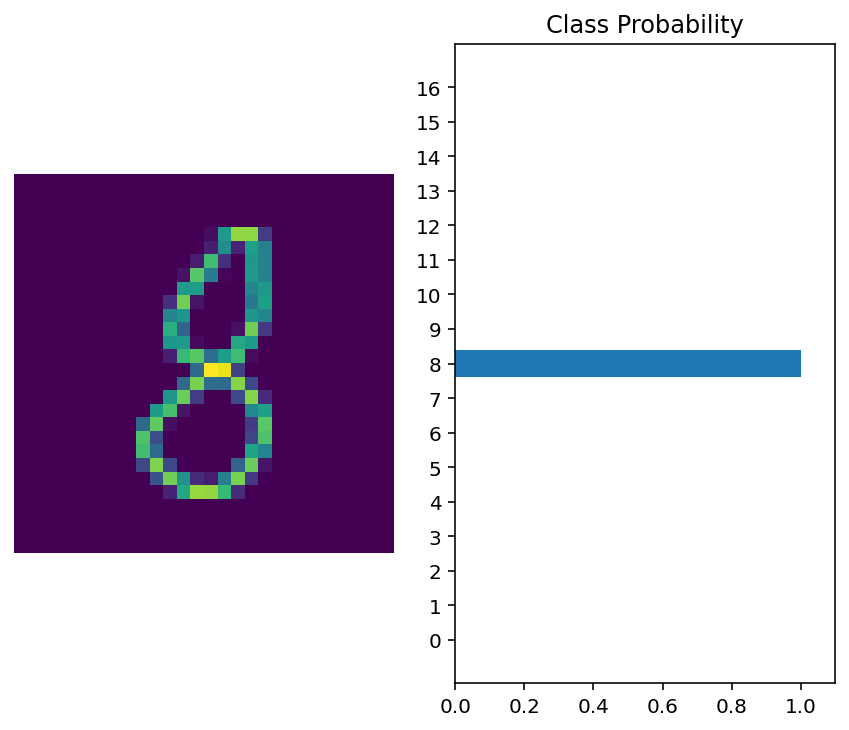

In [46]:
img = elpepe_img.view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Iterations vs Accuracy

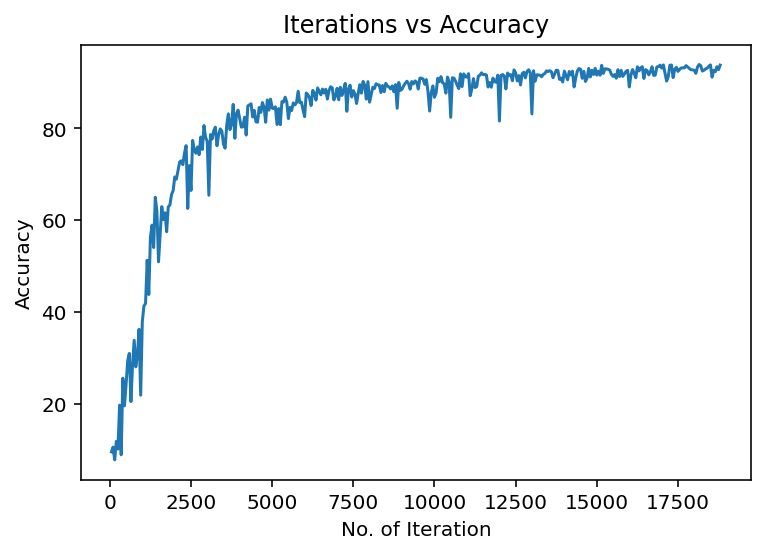

In [30]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

In [ ]:
Metrics Classification Report

In [31]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

In [32]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.88      0.86      0.87    831634
           1       0.74      0.76      0.75    830631
           2       0.82      0.77      0.79    832794
           3       0.79      0.78      0.79    832607
           4       0.77      0.72      0.74    831483
           5       0.85      0.76      0.81    833899
           6       0.83      0.87      0.85    831849
           7       0.86      0.82      0.84    830891
           8       0.86      0.86      0.86    833279
           9       0.86      0.82      0.84    831697
          10       0.78      0.78      0.78    833007
          11       0.87      0.98      0.92    831550
          12       0.86      0.84      0.85    832275
          13       0.83      0.92      0.87    830216
          14       0.85      0.87      0.86    834664
          15       0.77      0.82      0.80    833353
          16       0.87      0.90      0.88    83

Confusion Matrix

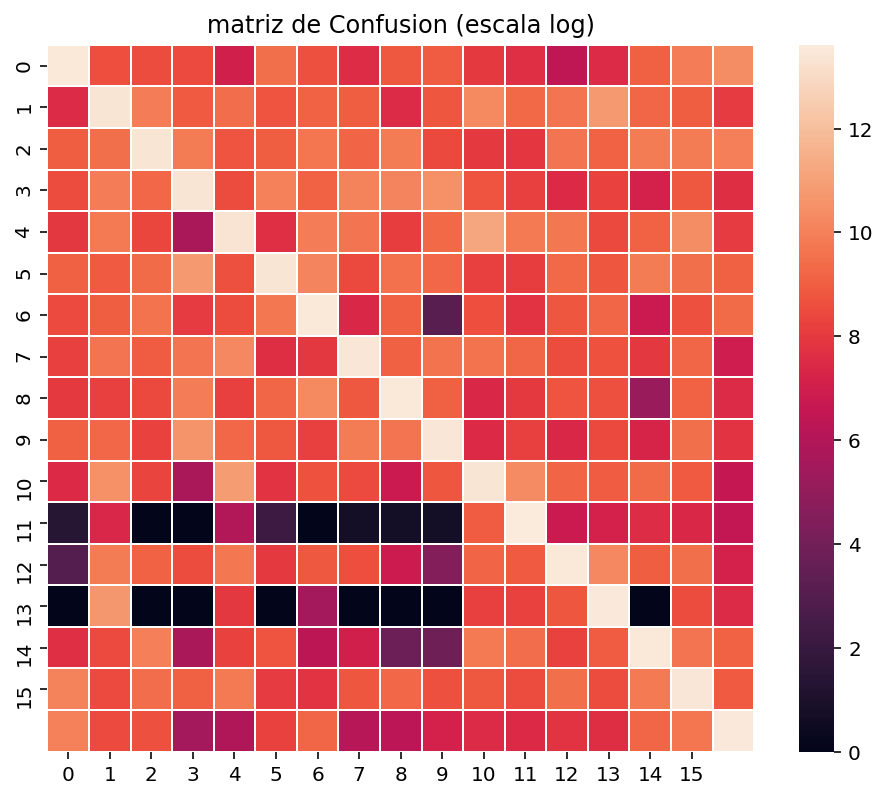

In [33]:
import seaborn as sns
C=confusion_matrix(labels_l, predictions_l)
plt.figure(figsize=(8,6.5))
plt.title('matriz de Confusion (escala log)')
sns.heatmap(np.log(C+1), 
            xticklabels=np.arange(16), 
            yticklabels=np.arange(16),
            square=True,
            linewidth=0.5,)

plt.show()